## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

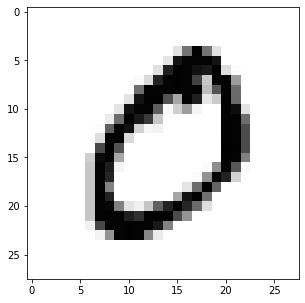

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2036 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 6/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9904
 99% acc reached
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9904


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\n 99% acc reached")
            self.model.stop_training = True


mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

plt.figure(figsize=(5, 5))
image = np.reshape(x_train[1], [28, 28])
plt.imshow(image, cmap='Greys')
plt.show()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    x_train,
    y_train,
    epochs=10,
    callbacks=[CustomCallbacks()]
)